In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/news-summary/news_summary_more.csv
/kaggle/input/news-summary/news_summary.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

In [4]:
data = pd.read_csv('/kaggle/input/news-summary/news_summary.csv', encoding='ISO-8859-1')
data.head()

,author,date,headlines,read_more,text,ctext
0,Chhavi Tyagi,"03 Aug 2017,Thursday",Daman & Diu revokes mandatory Rakshabandhan in...,http://www.hindustantimes.com/india-news/raksh...,The Administration of Union Territory Daman an...,The Daman and Diu administration on Wednesday ...
1,Daisy Mowke,"03 Aug 2017,Thursday",Malaika slams user who trolled her for 'divorc...,http://www.hindustantimes.com/bollywood/malaik...,Malaika Arora slammed an Instagram user who tr...,"From her special numbers to TV?appearances, Bo..."
2,Arshiya Chopra,"03 Aug 2017,Thursday",'Virgin' now corrected to 'Unmarried' in IGIMS...,http://www.hindustantimes.com/patna/bihar-igim...,The Indira Gandhi Institute of Medical Science...,The Indira Gandhi Institute of Medical Science...
3,Sumedha Sehra,"03 Aug 2017,Thursday",Aaj aapne pakad liya: LeT man Dujana before be...,http://indiatoday.intoday.in/story/abu-dujana-...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...
4,Aarushi Maheshwari,"03 Aug 2017,Thursday",Hotel staff to get training to spot signs of s...,http://indiatoday.intoday.in/story/sex-traffic...,Hotels in Maharashtra will train their staff t...,Hotels in Mumbai and other Indian cities are t...


In [5]:
data.columns

Index(['author', 'date', 'headlines', 'read_more', 'text', 'ctext'], dtype='object')

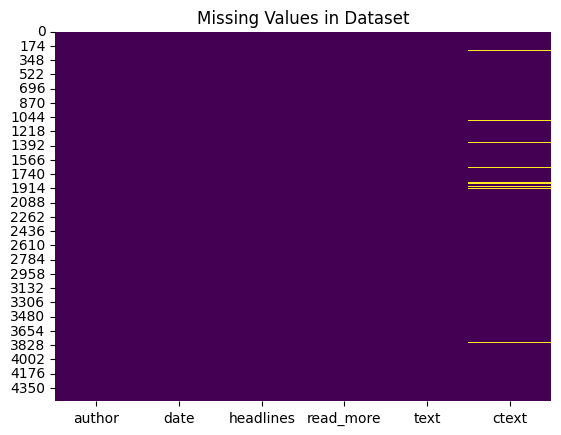

In [6]:
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values in Dataset")
plt.show()

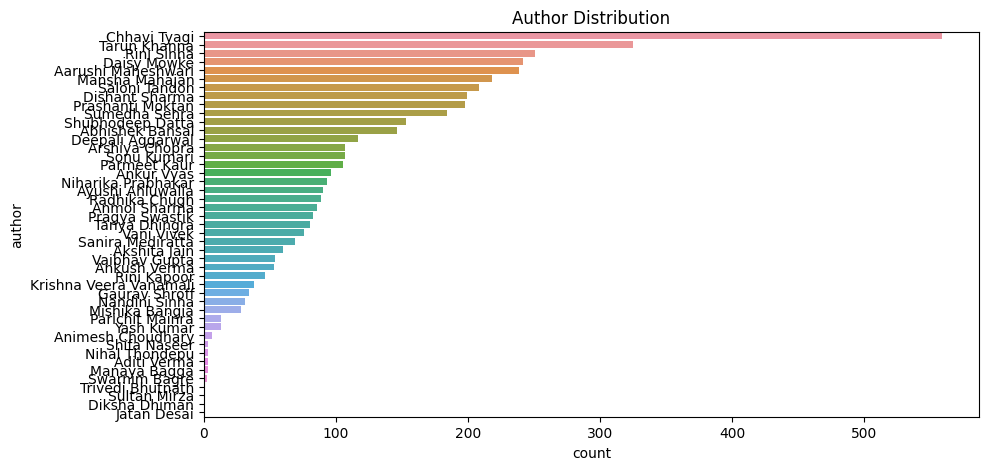

In [7]:
plt.figure(figsize=(10,5))
sns.countplot(y='author', data=data, order=data['author'].value_counts().index)
plt.title("Author Distribution")
plt.show()

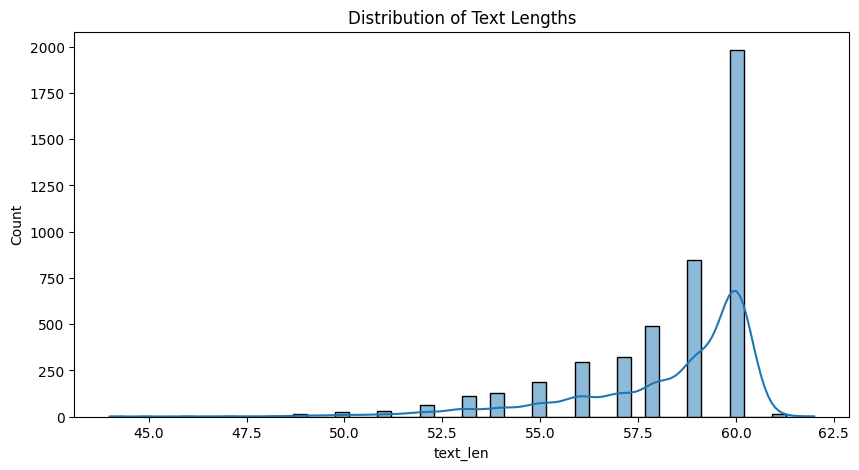

In [8]:
data['text_len'] = data['text'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(10,5))
sns.histplot(data['text_len'], bins=50, kde=True)
plt.title("Distribution of Text Lengths")
plt.show()

In [9]:
X = data['text'].fillna('')
y = data['author']

In [10]:
le = LabelEncoder()
y = le.fit_transform(y)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [12]:
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [13]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Multinomial NB": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42)
}

best_model = None
best_acc = 0

for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")
    
    if acc > best_acc:
        best_acc = acc
        best_model = (name, model)

print("\nBest Model:", best_model[0], "with Accuracy:", best_acc)

Logistic Regression Accuracy: 0.3012
Multinomial NB Accuracy: 0.2226
Random Forest Accuracy: 0.3112

Best Model: Random Forest with Accuracy: 0.31118493909191586


In [14]:
y_pred_best = best_model[1].predict(X_test_tfidf)

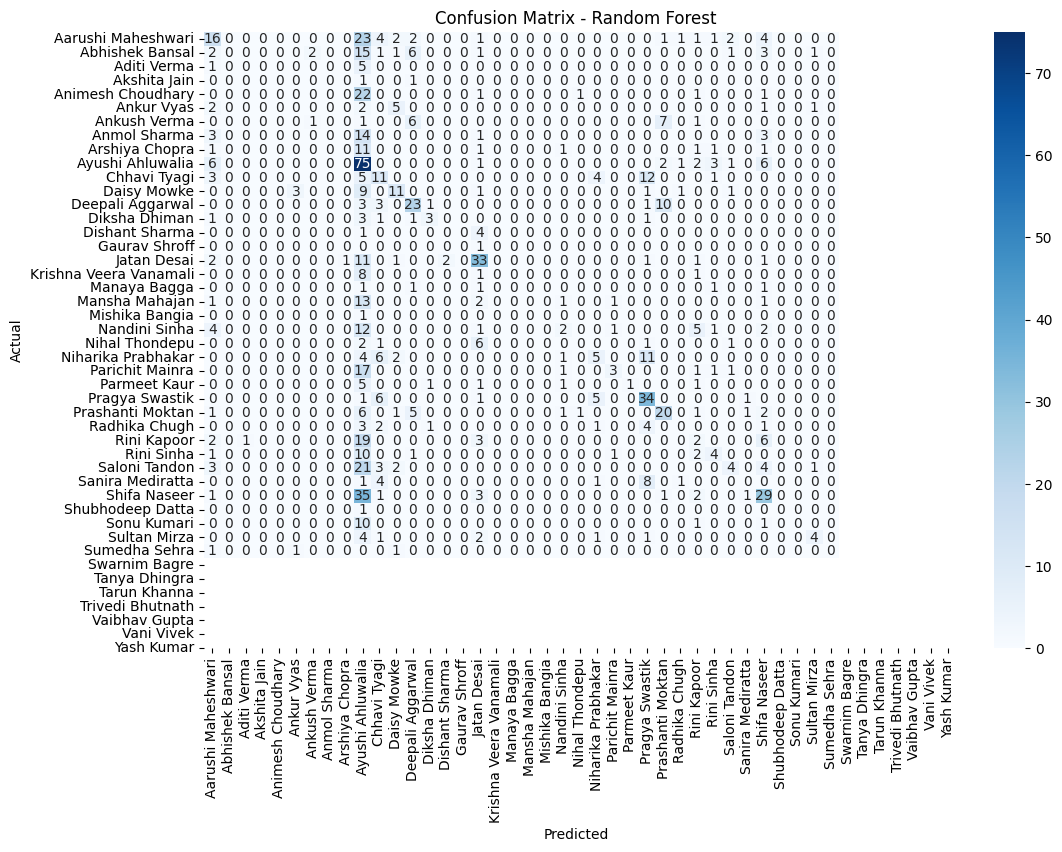

In [15]:
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title(f"Confusion Matrix - {best_model[0]}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [16]:
sample_df = pd.DataFrame({
    'Text': X_test[:5],
    'Actual': le.inverse_transform(y_test[:5]),
    'Predicted': le.inverse_transform(y_pred_best[:5])
})
print("\nSample Predictions:")
print(sample_df)


Sample Predictions:
                                                   Text            Actual  \
4235  All restaurants, including five-star hotels, i...      Chhavi Tyagi   
798   The Chinese government has banned singer Justi...  Prashanti Moktan   
2321  Pakistan on Saturday accused India of targetin...  Deepali Aggarwal   
3352  A 40-year-old woman in Hyderabad was burnt ali...      Chhavi Tyagi   
2304  The Delhi Police has arrested a man working as...     Sumedha Sehra   

          Predicted  
4235    Sonu Kumari  
798     Daisy Mowke  
2321  Sumedha Sehra  
3352   Chhavi Tyagi  
2304   Chhavi Tyagi  
